# 그래프 서식 설정(matplotlib, seaborn)
- x축 눈금에 천단위 쉼표 넣기
- 그래프 값 라벨링하기 + 천단위 쉼표 넣기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### x축 눈금에 천단위 쉼표 넣기

In [9]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 뇌병변 중 뇌졸중과 뇌손상 불러오기
df = raw_df[(raw_df['주된 진단명(1)']==2) | (raw_df['주된 진단명(1)']==3)]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


In [10]:
# 데이터 추출
reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0][df['주된 진단명(1)']==2].value_counts()).reset_index()

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(reason_df)):
    reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)
reason_df

<ipython-input-10-42139ce810ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0][df['주된 진단명(1)']==2].value_counts()).reset_index()


,재활치료서비스를 하나도 이용하지 않은 경우 이유,0
0,다닐 필요가 없어서,116
1,접근하기 어려워서,86
2,비용부담 때문에,44
3,다른 방법이 있어서,23
4,시설이 없어서,16
5,믿지 못해서,11
6,기타,9
7,몰라서,2
8,대기중이어서,2


In [20]:
# 임의로 0 칼럼 중에서 아무 숫자나 1천 이상으로 변경
reason_df.replace({0: 116}, {0: 1200}, inplace=True)
reason_df

,재활치료서비스를 하나도 이용하지 않은 경우 이유,0
0,다닐 필요가 없어서,1200
1,접근하기 어려워서,86
2,비용부담 때문에,44
3,다른 방법이 있어서,23
4,시설이 없어서,16
5,믿지 못해서,11
6,기타,9
7,몰라서,2
8,대기중이어서,2


In [21]:
order_lst = reason_df['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

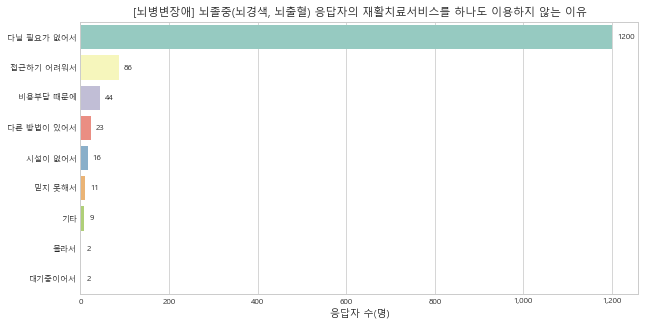

In [22]:
# 시각화
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

splot = sns.barplot(data = reason_df, y='재활치료서비스를 하나도 이용하지 않은 경우 이유', x = 0,order = order_lst, palette='Set3')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 재활치료서비스를 하나도 이용하지 않는 이유', size = 11)
ax.set_xlabel('응답자 수(명)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)   

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

### 그래프 값 라벨링하기(x축) + 천단위 쉼표 넣기

In [16]:
df = pd.DataFrame({'id': ['강', '산', '하늘', '땅', '바다'],
                  'values':[1000, 1100, 990, 1231, 950]}) # 예시 데이터 생성
df.sort_values(by='values', ascending=False, inplace=True) # value 기준 내림차순
df

,id,values
3,땅,1231
1,산,1100
0,강,1000
2,하늘,990
4,바다,950


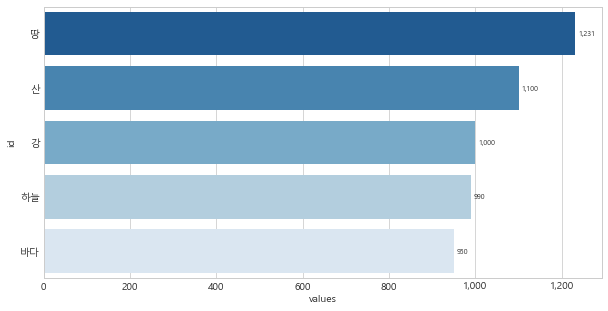

In [21]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 5)

palette = sns.color_palette("Blues", n_colors=5) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = df, x = 'values', y='id', palette=palette)

## 그래프 값 라벨링 하기(x축)
for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)
    
### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

### 그래프 값 라벨링하기(y축) + 천단위 쉼표 넣기

In [24]:
df = pd.DataFrame({'names': ['유리', '짱구', '철수', '맹구', '훈이'],
                  'values':[800, 1100, 990, 1032, 950]}) # 예시 데이터 생성
df.sort_values(by='values', ascending=False, inplace=True) # value 기준 내림차순
df

,names,values
1,짱구,1100
3,맹구,1032
2,철수,990
4,훈이,950
0,유리,800


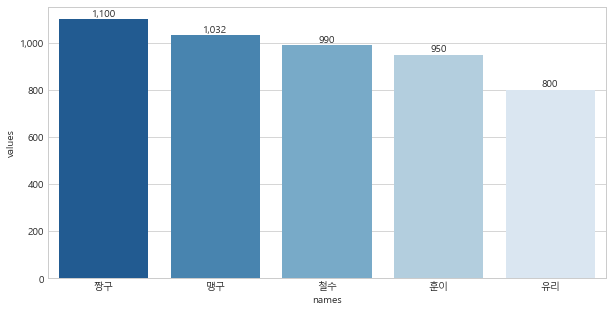

In [29]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 5)

palette = sns.color_palette("Blues", n_colors=5) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = df, x = 'names', y = 'values', palette=palette)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format)